# University of California Undergraduate Experience Survey Longitudinal Data Analysis
Survey item - "satisfaction with the value of education for the price you're paying"

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("./data/uc_student_sat_survey_by_year_by_discipline.csv")
df

,Category,Year,Response,Count,Diverge Pct Abs,Diverge Pct
0,Arts,2022,Somewhat Dissatisfied,395,0.177928,-0.177928
1,Arts,2020,Somewhat Dissatisfied,455,0.190856,-0.190856
2,Arts,2018,Somewhat Dissatisfied,346,0.175367,-0.175367
3,Arts,2016,Somewhat Dissatisfied,309,0.160187,-0.160187
4,Arts,2014,Somewhat Dissatisfied,329,0.161591,-0.161591
...,...,...,...,...,...,...
427,Undeclared /Other,2014,Very Satisfied,912,0.093309,0.093309
428,Undeclared /Other,2012,Very Satisfied,722,0.080437,0.080437
429,Undeclared /Other,2010,Very Satisfied,1231,0.097013,0.097013
430,Undeclared /Other,2008,Very Satisfied,1687,0.133857,0.133857


In [16]:
df = df.loc[:, ["Category", "Year", "Response", "Count"]]
df.dtypes

Category    object
Year         int64
Response    object
Count        int64
dtype: object

In [42]:
# get response count for each (Category, Year) group
grouped = df.groupby(["Category", "Year"])["Count"]
df["Category_Yr_Count"] = grouped.transform("sum")
df

,Category,Year,Response,Count,Diverge Pct Abs,Diverge Pct,Category_Yr_Count
0,Arts,2022,Somewhat Dissatisfied,395,0.177928,-0.177928,2220
1,Arts,2020,Somewhat Dissatisfied,455,0.190856,-0.190856,2384
2,Arts,2018,Somewhat Dissatisfied,346,0.175367,-0.175367,1973
3,Arts,2016,Somewhat Dissatisfied,309,0.160187,-0.160187,1929
4,Arts,2014,Somewhat Dissatisfied,329,0.161591,-0.161591,2036
...,...,...,...,...,...,...,...
427,Undeclared /Other,2014,Very Satisfied,912,0.093309,0.093309,9774
428,Undeclared /Other,2012,Very Satisfied,722,0.080437,0.080437,8976
429,Undeclared /Other,2010,Very Satisfied,1231,0.097013,0.097013,12689
430,Undeclared /Other,2008,Very Satisfied,1687,0.133857,0.133857,12603


In [43]:
df["Response_Pct"] = df["Count"] / df["Category_Yr_Count"]

<AxesSubplot:xlabel='Response', ylabel='Category'>

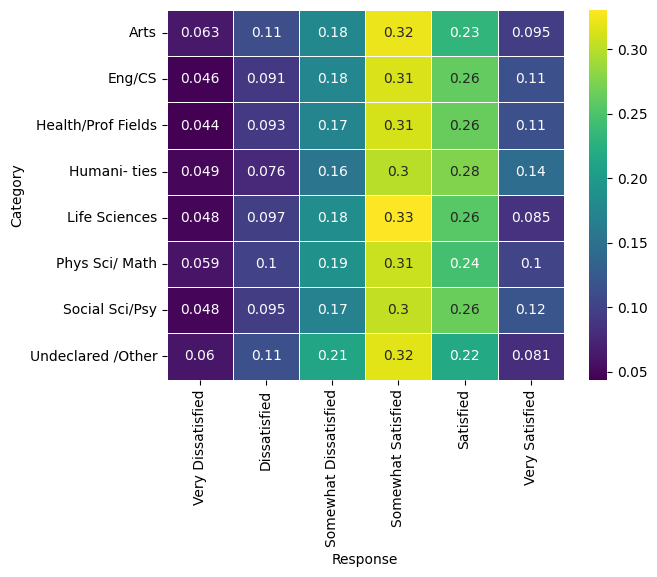

In [37]:
# student satisfaction survey 2022
df_2022 = df[df["Year"] == 2022]
pv = pd.pivot_table(
    df_2022, index="Category", columns="Response", values="Response_Pct"
).loc[:, ["Very Dissatisfied", "Dissatisfied", "Somewhat Dissatisfied", "Somewhat Satisfied", "Satisfied", "Very Satisfied"]]
sns.heatmap(pv, annot=True, linewidth=.5, cmap=sns.color_palette("viridis", as_cmap=True))

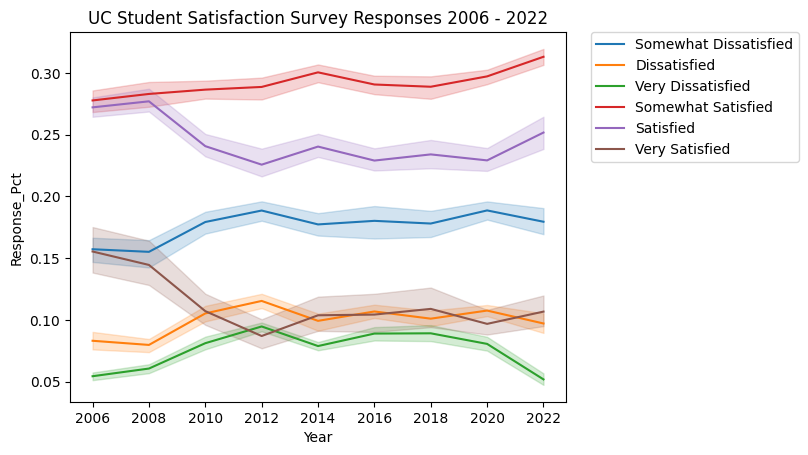

In [53]:
# student satisfaction survey over time
sns.lineplot(data=df, x="Year", y="Response_Pct", hue="Response").set(title="UC Student Satisfaction Survey Responses 2006 - 2022")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)